<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/Keras_models_inherited_from_Model_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [76]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    # initializing Model class init
    super().__init__()
    # layers setup
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation='relu')
    self.priority_output = layers.Dense(1, activation='sigmoid')
    self.deprtment_output = layers.Dense(num_departments, activation='softmax')

  def call(self, inputs):
    # features selection from call kwargs
    title = inputs['title']
    text_body = inputs['text_body']
    tags = inputs['tags']

    # calling layers with our features
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)

    priority = self.priority_output(features)
    department = self.deprtment_output(features)

    return priority, department


In [77]:
num_samples = 1280
vocab_size = 10_000

In [78]:
title_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
tags_data = np.random.randint(0, 2, size=(num_samples, 100))

In [79]:
priority_data = np.random.random(size=(num_samples, 1))
dep_data = np.random.randint(0, 2, size=(num_samples, 4))

In [80]:
model = CustomerTicketModel(num_departments=4)

priority, department = model({'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

In [81]:
model.summary()

Model: "customer_ticket_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate_5 (Concatenate  multiple                  0         
 )                                                               
                                                                 
 dense_24 (Dense)            multiple                  1286464   
                                                                 
 dense_25 (Dense)            multiple                  65        
                                                                 
 dense_26 (Dense)            multiple                  260       
                                                                 
Total params: 1286789 (4.91 MB)
Trainable params: 1286789 (4.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# this model can be fitted, evaluated and so on as normal keras model can (logical)

In [83]:
# but we can build our own add-ons to our custom model and so on

In [84]:
# Example

In [85]:
import webbrowser

In [86]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    # initializing Model class init
    super().__init__()
    # layers setup
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation='relu')
    self.priority_output = layers.Dense(1, activation='sigmoid')
    self.deprtment_output = layers.Dense(num_departments, activation='softmax')

  def call(self, inputs):
    webbrowser.open('https://www.youtube.com/watch?v=dQw4w9WgXcQ')
    # features selection from call kwargs
    title = inputs['title']
    text_body = inputs['text_body']
    tags = inputs['tags']

    # calling layers with our features
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)

    priority = self.priority_output(features)
    department = self.deprtment_output(features)

    return priority, department

In [87]:
# now everytime when we call our model we will be rickrolled
# (keras, please add it in new update🙏)

In [88]:
model = CustomerTicketModel(num_departments=4)
priority, department = model({'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

In [89]:
model.layers

In [90]:
try:
  model.layers[1].output
except Exception as e:
  print(f"we can't access layers params, it'll raise error: '{e}'")

we can't access layers params, it'll raise error: 'Layer dense_27 has no inbound nodes.'


we can't also plot our model

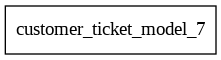

In [91]:
keras.utils.plot_model(model)

In [92]:
# bruh

So there's not only pros, but also some cons

P.S I also noticed that model summary doesn't display as much info as summary on functional API does

In [93]:
# so in this case we cant really examine forward propagation

# **BUT NOW WE CAN DO VERY INTERESTING THINGS**

In [94]:
class SmartClassifier(keras.Model):
  def __init__(self, num_classes):
    super().__init__()
    if num_classes == 2:
      units = 1
      activation = 'sigmoid'
    else:
      units = num_classes
      activation = 'softmax'
    self.dense_1 = layers.Dense(units, activation)

  def call(self, inputs):
    return self.dense_1(inputs)

In [95]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = SmartClassifier(num_classes=3)(features)

model = keras.Model(inputs=inputs, outputs=outputs)

In [96]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_30 (Dense)            (None, 64)                256       
                                                                 
 smart_classifier_3 (SmartC  (None, 3)                 195       
 lassifier)                                                      
                                                                 
Total params: 451 (1.76 KB)
Trainable params: 451 (1.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


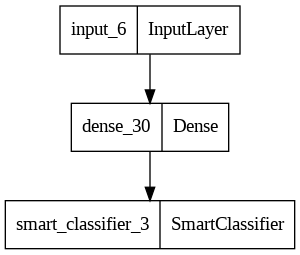

In [97]:
keras.utils.plot_model(model)

# **TRIPLE BAM!!!**
We've created our own custom model inherired from keras Model and used it in functional API

In [98]:
inputs = keras.Input(shape=(3,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
bin_clf = keras.Model(inputs=inputs, outputs=outputs)

In [99]:
class MyModel(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    self.dense_1 = layers.Dense(64, activation='relu')
    self.classifier = bin_clf

  def call(self, inputs):
    features = self.dense_1(inputs)
    return self.classifier(features)

In [100]:
my_model = MyModel()

# **AND HERE WE USED FUNCTIONAL API INSIDE OF CUSTOM MODEL INHERITED FROM KERAS MODEL CLASS**

# **TODAY'S CODE IN A NUTSHELL:**

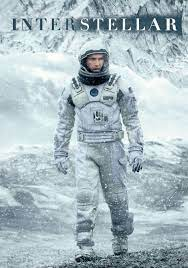

<img src='https://play-lh.googleusercontent.com/TGaTckK5V7VKlJ34PFlON5ei_DARWndAHrDqOWTaC6kH5R8V8RlxE6i22VswAx3ENx-3'>